<a href="https://colab.research.google.com/github/AyushShinde88/MLnow_GS/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Ayush Shinde

**Reach out**:
 | [GitHub](https://github.com/AyushShinde88) | 



## Setup

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd '/content/drive/MyDrive/ML.now()/LiveCodeSessions/02_EDA/student'

/content/drive/MyDrive/ML.now()/LiveCodeSessions/02_EDA/student


In [7]:
ls

cleanedMathData.csv  student-mat.gsheet  student-por.csv
student-mat.csv      student-merge.R     student.txt


In [8]:
import os

In [9]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [10]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [11]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [12]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [13]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [14]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


## Data visualization

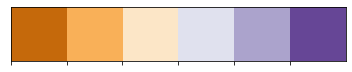

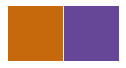

In [15]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [16]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

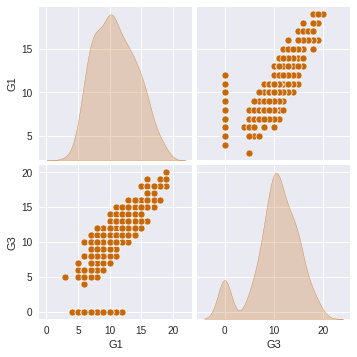

In [17]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [18]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [19]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [20]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [21]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [22]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [23]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [24]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [25]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 21ms/step - loss: 9.5137 - mae: 9.5137 - mse: 107.0444 - val_loss: 9.9312 - val_mae: 9.9312 - val_mse: 114.9584
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 9.4149 - mae: 9.4149 - mse: 104.6889 - val_loss: 9.8210 - val_mae: 9.8210 - val_mse: 112.2816
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 9.3125 - mae: 9.3125 - mse: 102.2948 - val_loss: 9.7124 - val_mae: 9.7124 - val_mse: 109.6766
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 9.2133 - mae: 9.2133 - mse: 99.9427 - val_loss: 9.6027 - val_mae: 9.6027 - val_mse: 107.0757
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 9.1127 - mae: 9.1127 - mse: 97.6611 - val_loss: 9.4928 - val_mae: 9.4928 - val_mse: 104.5056
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 9.0132 - mae: 9.0132 - mse: 95.4056 - val_loss: 9.3821 - val_mae: 9.3821 - val_mse: 101.9511


In [26]:
print(history)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


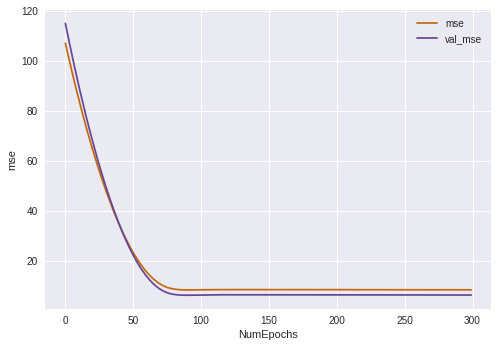

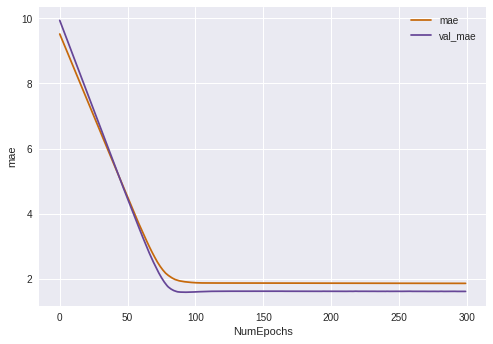

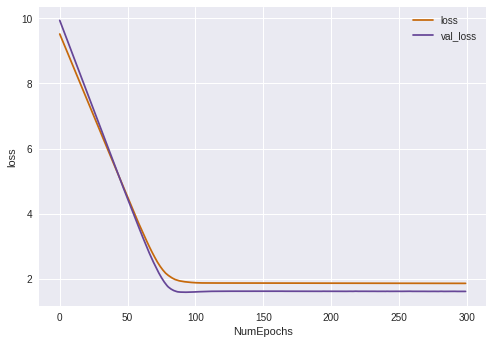

In [28]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [29]:
model.predict([1])

array([[1.5542483]], dtype=float32)

In [30]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.5542483]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.5542483]
 [2.5039237]
 [3.453599 ]
 [4.403274 ]
 [5.3529496]]

List of Predictions (flattened out):
[1.5542483 2.5039237 3.453599  4.403274  5.3529496]



In [31]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [32]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [33]:
print(len(testPreds))
print(testPreds)

79
[13.900027   6.3026247 11.051002  16.749052  16.749052  12.000677
 13.900027  18.648403  18.648403   8.201976  13.900027  12.950353
  8.201976   7.2523     9.151651  12.950353  11.051002  15.799378
  7.2523    10.101327  14.849703  12.950353  13.900027  15.799378
  7.2523     7.2523     8.201976  10.101327  12.000677  10.101327
 12.000677  12.950353  10.101327   6.3026247  9.151651  12.000677
  7.2523     8.201976  13.900027   9.151651   9.151651   7.2523
 12.000677   6.3026247 12.950353   7.2523     7.2523    11.051002
 12.950353  16.749052  12.000677  14.849703   9.151651  12.000677
 14.849703  12.000677  14.849703  12.000677  14.849703  11.051002
 12.000677   8.201976  15.799378   7.2523    15.799378  11.051002
 15.799378  12.950353   8.201976   8.201976  12.000677  17.698729
 12.950353  15.799378  10.101327   7.2523    10.101327   7.2523
 11.051002 ]


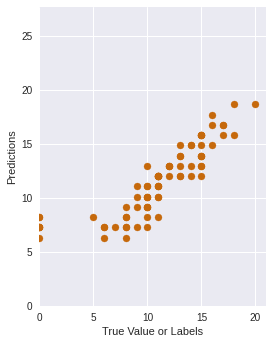

In [34]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

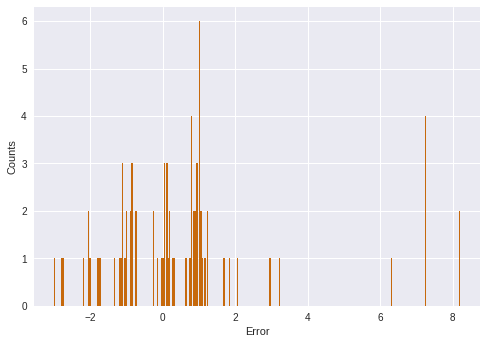

In [35]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions